In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/germany-electricity-power-for-20062017/opsd_germany_daily.csv


In [2]:
import pandas as pd
opsd_daily   = pd.read_csv("../input/germany-electricity-power-for-20062017/opsd_germany_daily.csv",index_col=0, parse_dates=True)

In [3]:
opsd_daily.shape

(4383, 4)

In [4]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
opsd_daily.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


check out the data types of each column

In [6]:
opsd_daily.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [7]:
# Add columns with year, month, and weekday name
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.weekday_name


In [8]:
# Display a random sampling of 5 rows
opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

we can select data for a single day using a string such as '2017-08-10'.

In [9]:
opsd_daily.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

**select a slice of days, such as '2014-01-20':'2014-01-22'. As with regular label-based indexing with loc, the slice is inclusive of both endpoints.**

In [10]:
opsd_daily.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


**Selct entire month of February 2012 with opsd_daily.loc['2012-02'].**

In [11]:
opsd_daily.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


Visualizing time series data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

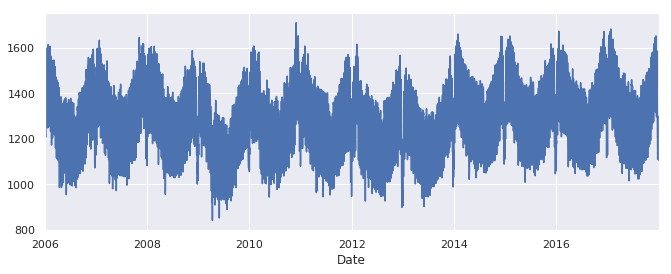

In [13]:
opsd_daily['Consumption'].plot();

the above line plot is crowded and hard to read.
Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

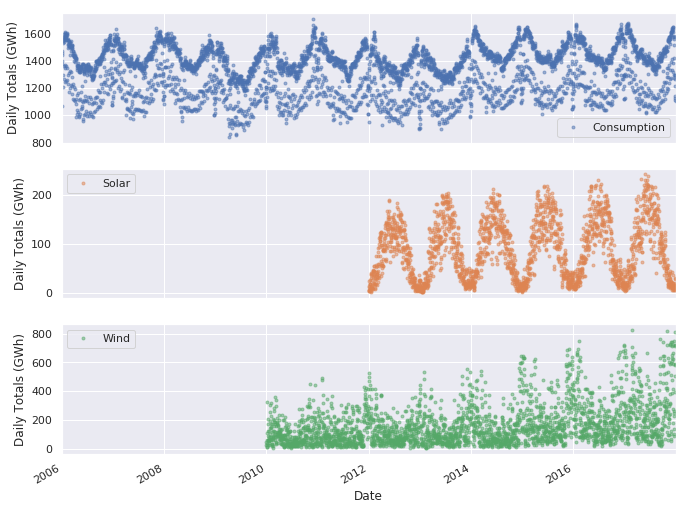

In [14]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Solar and wind we see seasonal variations which needs to be investigated in detail

Let’s plot the time series in a single year to investigate further.

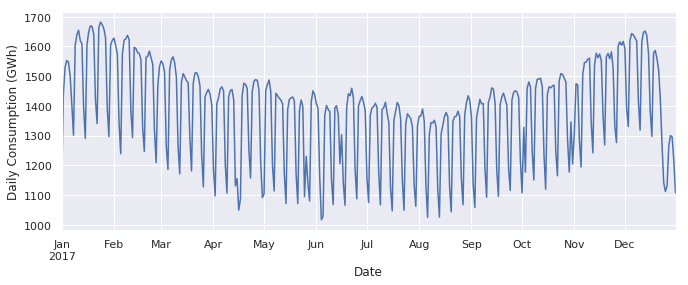

In [15]:
ax = opsd_daily.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Let’s zoom in further and look at just January and February.

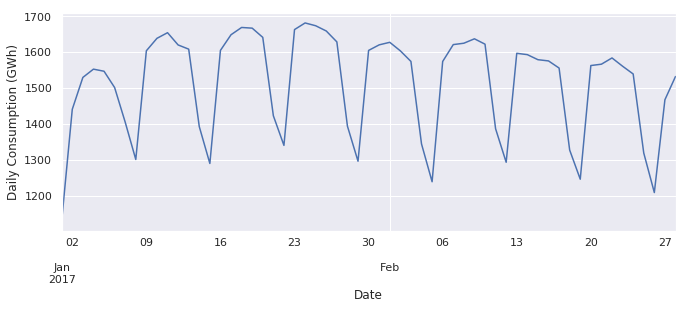

In [16]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

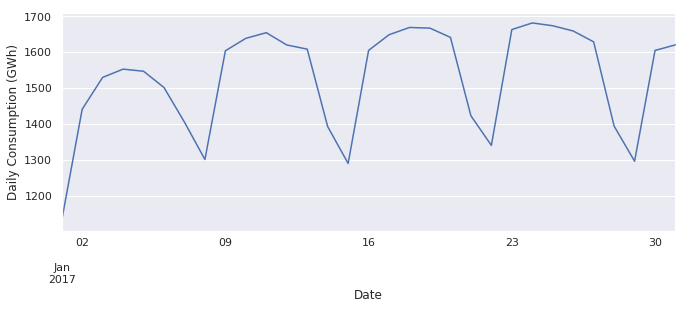

In [17]:
ax = opsd_daily.loc['2017-01', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

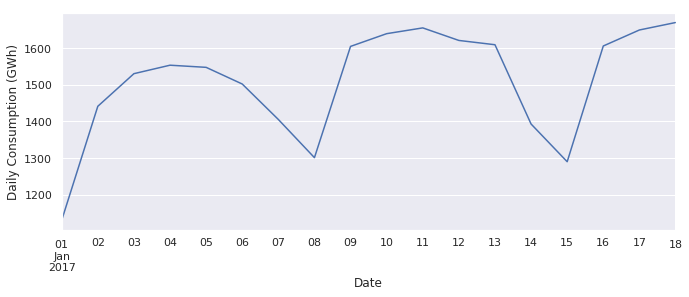

In [18]:
ax = opsd_daily.loc['2017-01-01':'2017-01-18', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

let’s  explore the seasonality of our data with box plots, using seaborn’s boxplot() 

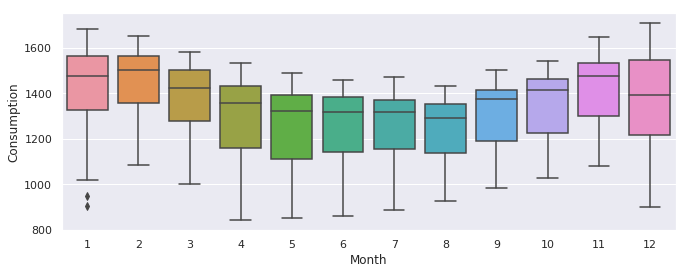

In [19]:
sns.boxplot(data=opsd_daily, x='Month', y='Consumption')

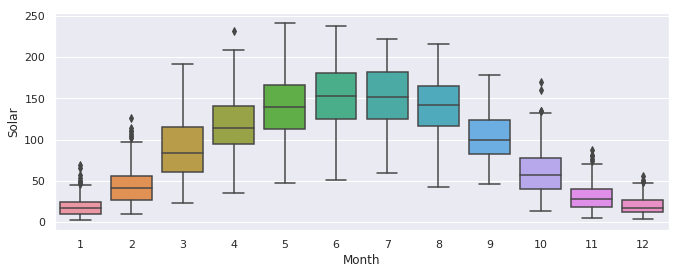

In [20]:
sns.boxplot(data=opsd_daily, x='Month', y='Solar')

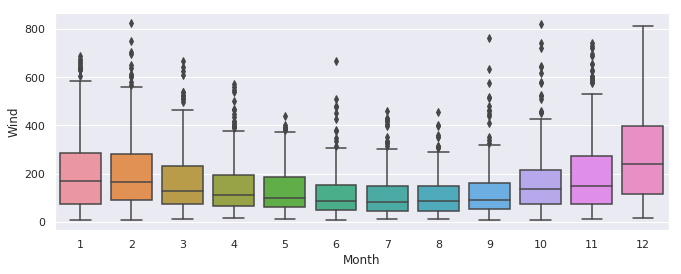

In [21]:
sns.boxplot(data=opsd_daily, x='Month', y='Wind')

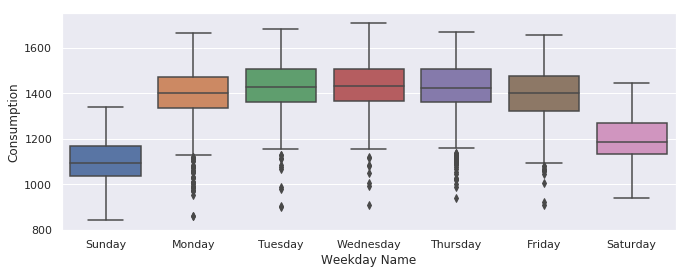

In [22]:
sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

As expected, electricity consumption is significantly higher on weekdays than on weekends. The low outliers on weekdays are presumably during holidays.

In [23]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


In [24]:
opsd_7 = opsd_daily[data_columns].rolling(7).mean()
opsd_7.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN
2006-01-06,NaN,NaN,NaN,NaN
2006-01-07,1361.471429,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-09,1402.557571,NaN,NaN,NaN


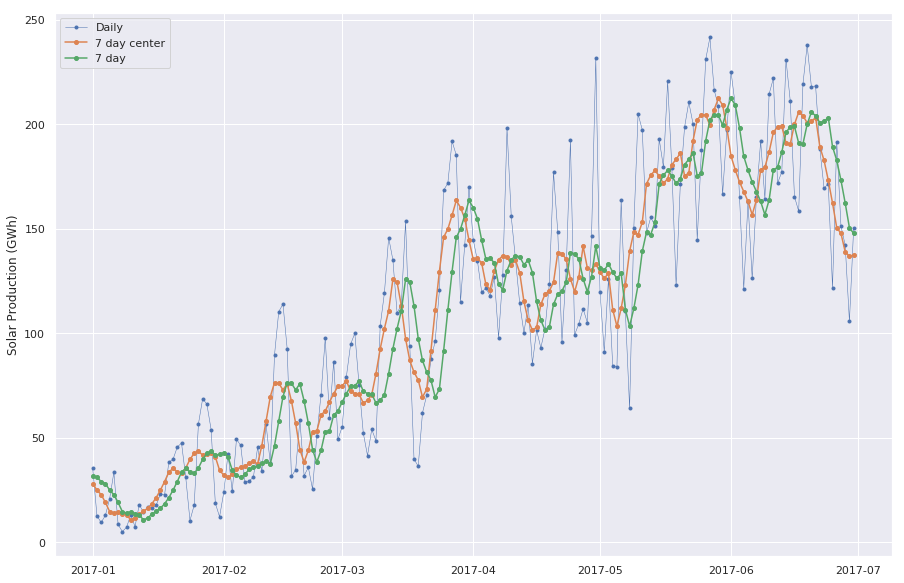

In [25]:
sns.set(rc={'figure.figsize':(15, 10)})
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, 'Solar'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_7d.loc[start:end, 'Solar'],marker='.', markersize=8, linestyle='-', label='7 day center')
ax.plot(opsd_7.loc[start:end, 'Solar'],marker='.', markersize=8, linestyle='-', label='7 day ')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();